In [1]:
# Import packages
import pandas as pd
import NEOvisualizer as nv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from importlib import reload
reload(nv)

%matplotlib widget

In [2]:
# Get Data
filename = 'NEOdata.csv'
df = pd.read_csv(filename)

from ipywidgets import interact, fixed, FloatSlider
from astropy.time import Time

# construct NEO objects and hold them in a list (or other iterable data structures)
objList = []
for i in range(5):
    objList.append(nv.NEOvisualizer(df.iloc[i]))

today = Time.now()
utc = today.utc
JDTDB = today.tdb.jd

interactive(children=(FloatSlider(value=2.5, description='radius', max=10.0, min=0.1), Output()), _dom_classes…

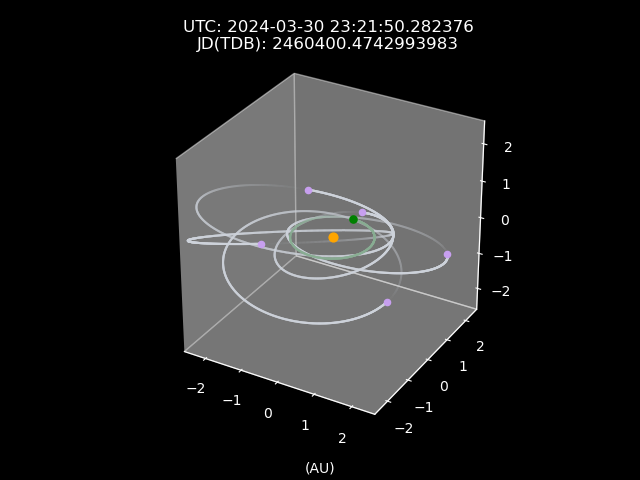

In [3]:
# open a figure
plt.close('all') # close other open figures
plt.style.use('dark_background')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # new figure
ax.grid(visible=False)
ax.set_box_aspect(aspect=(1, 1, 1))
# Title and label
fig.text(0.5,0.01,s='(AU)',ha='center',va='bottom')
ax.set_title("UTC: {}\nJD(TDB): {}".format(utc, JDTDB))
# plot the Sun
ax.scatter(0,0,0, c='orange', s=40)

# plot objects
for i in range(5): # first 200 objects
    objList[i].plotBetterOrbit(ax)

    
# Interactive    
def plot(ax, radius):
    ax.set_xlim3d(-radius,radius)
    ax.set_ylim3d(-radius,radius)
    ax.set_zlim3d(-radius,radius)

interact(plot, ax=fixed(ax), radius = FloatSlider(value=2.5, min=0.1, max=10.0, step=0.1))

# plot the Earth
nv.plotEarth(ax, trail=True)